In [1]:

from IPython.display import display, Image, SVG
from keras.models import load_model

def loadModel(modelPath):
    """
    Loads the model `modelPath`.
    """
    model = load_model(modelPath)
    return model


Using TensorFlow backend.


In [2]:
def getLayerConfig(layer):
    """
    Extract configuration from `layer`.
    """
    layerType = layer.__class__.__name__
    output = { 'type': layerType }
    config = layer.get_config()
    if layerType == 'Lambda':
        _, x, y, d = config['batch_input_shape']
        output['input'] = (x, y, d)
    if layerType == 'Cropping2D':
        output['cropping'] = config['cropping']
    if layerType == 'Convolution2D':
        output['activation'] = config['activation']
        output['strides'] = config['subsample']
        output['filters'] = config['nb_filter']
        output['kernel'] = ( config['nb_col'], config['nb_row'] )
    if layerType == 'Dense':
        output['activation'] = config['activation']
        output['output'] = config['output_dim']
        output['input'] = config['input_dim']
    return output

In [3]:
import graphviz as gv
import functools
import json

In [28]:
def createNode(nodeName, layer, g):
    """
    Creates a node with the information from `layer` in the `g`.
    """
    type = layer['type']
    label = type + '\n'
    for key, value in layer.items():
        if (key != 'type'):
            label += '{}: {}\n'.format(key, value)
    g.node(nodeName, label=label)

def visualizeLayers(layers, outputPath):
    """
    Visualize `layers` and store the image at `outputPath`.
    """
    g = gv.Digraph(format='png')
    for index, layer in enumerate(layers):
        createNode(str(index), layer, g)
        if index != 0:
            g.edge(str(index - 1), str(index))
            
    styles = {
        'graph': {
            'rankdir': 'LR',
        },
        'nodes': {
            'fontname': 'Helvetica',
        },
        'edges': {
            'arrowhead': 'open'
        }
    }
    g.graph_attr.update(
        ('graph' in styles and styles['graph']) or {}
    )
    g.node_attr.update(
        ('nodes' in styles and styles['nodes']) or {}
    )
    g.edge_attr.update(
        ('edges' in styles and styles['edges']) or {}
    )
    
    g.render(outputPath)
    figure = SVG(outputPath + '.svg')
    display(figure)

In [29]:
def visualizeModel(modelPath, imagePath):
    """
    Visualize the model found at `modelPath` to a SVG at `imagePath`
    """
    model = loadModel(modelPath)
    layerData = list(map(getLayerConfig, model.layers))
    visualizeLayers(layerData, imagePath)


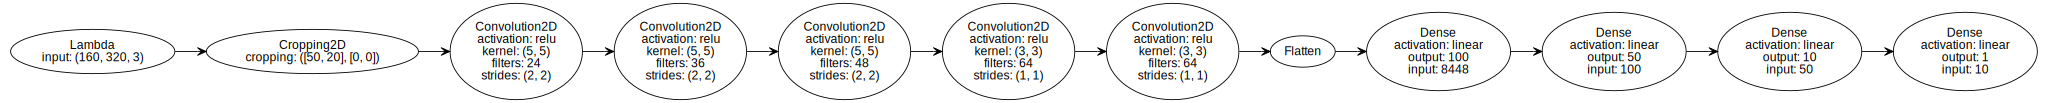

In [30]:
visualizeModel('./models/nVidea_data.h5', 'images/nVidea_data')